### Author: Nagendra Babu
### Data Science and Business Analytics Internship @ The Sparks Foundation
#### GRIPMAY21

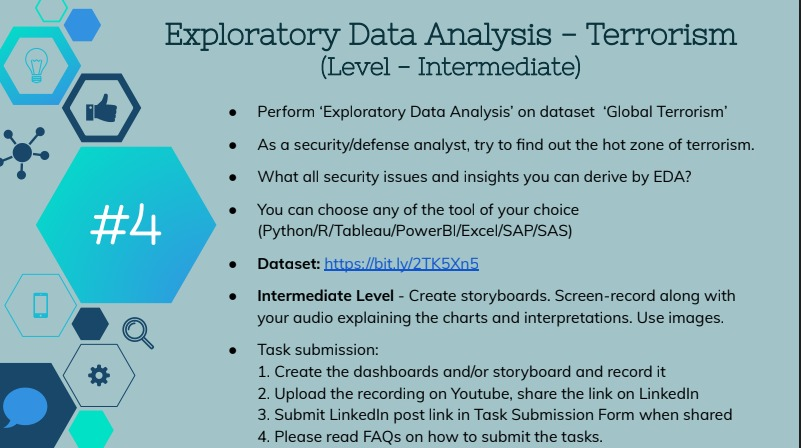

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Terrorism/globalterrorism.csv")
data.head()

C:\Users\SuresH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
data.shape

(181691, 135)

In [5]:
#Renaming the columns 

data.rename(columns = {'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country_Name',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'} , inplace = True)

In [6]:
#using necessary columns for data analysis and deleting the rest
data  = data[['Year','Month','Extended','Day','Country_Name','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [7]:
data.head()

,Year,Month,Extended,Day,Country_Name,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
data.shape

(181691, 19)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          181691 non-null  int64  
 1   Month         181691 non-null  int64  
 2   Extended      181691 non-null  int64  
 3   Day           181691 non-null  int64  
 4   Country_Name  181691 non-null  object 
 5   State         181270 non-null  object 
 6   Region        181691 non-null  object 
 7   City          181257 non-null  object 
 8   Latitude      177135 non-null  float64
 9   Longitude     177134 non-null  float64
 10  AttackType    181691 non-null  object 
 11  Killed        171378 non-null  float64
 12  Wounded       165380 non-null  float64
 13  Target        181055 non-null  object 
 14  Summary       115562 non-null  object 
 15  Group         181691 non-null  object 
 16  Target_type   181691 non-null  object 
 17  Weapon_type   181691 non-null  object 
 18  Moti

In [10]:
data.isnull().sum()

Year                 0
Month                0
Extended             0
Day                  0
Country_Name         0
State              421
Region               0
City               434
Latitude          4556
Longitude         4557
AttackType           0
Killed           10313
Wounded          16311
Target             636
Summary          66129
Group                0
Target_type          0
Weapon_type          0
Motive          131130
dtype: int64

In [11]:
data['Wounded'] = data['Wounded'].fillna(0) 
data['Killed'] = data['Killed'].fillna(0)

In [12]:
#creating new column affected having data of killed and Wounded
data['affected'] = data['Killed'] + data['Wounded']

In [13]:
#checking the correlation
data.corr()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded,affected
Year,1.000000,0.000139,0.091754,0.018254,0.166933,0.003917,0.021252,0.017484,0.020675
Month,0.000139,1.000000,-0.000468,0.005497,-0.015978,-0.003880,0.004031,0.003178,0.003805
Extended,0.091754,-0.000468,1.000000,-0.004700,-0.024749,0.000523,0.014586,-0.010175,-0.004570
Day,0.018254,0.005497,-0.004700,1.000000,0.003423,-0.002285,-0.003225,-0.001082,-0.001808
Latitude,0.166933,-0.015978,-0.024749,0.003423,1.000000,0.001463,-0.013170,0.015920,0.009899
Longitude,0.003917,-0.003880,0.000523,-0.002285,0.001463,1.000000,-0.000587,0.000205,0.000013
Killed,0.021252,0.004031,0.014586,-0.003225,-0.013170,-0.000587,1.000000,0.443326,0.651885
Wounded,0.017484,0.003178,-0.010175,-0.001082,0.015920,0.000205,0.443326,1.000000,0.968724
affected,0.020675,0.003805,-0.004570,-0.001808,0.009899,0.000013,0.651885,0.968724,1.000000


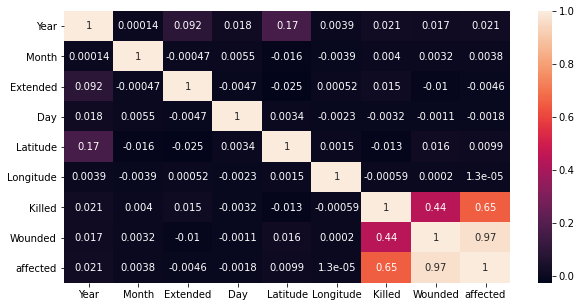

In [14]:
#creating a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot = True )
plt.show()

### No of attacks per year

In [15]:
Year_data = data['Year'].value_counts().sort_values() 
Year_data

1971      471
1973      473
1972      568
1974      581
1970      651
1975      740
1976      923
1998      934
2004     1166
2003     1278
1977     1319
2002     1333
1999     1395
1978     1526
2000     1814
2001     1906
2005     2017
1982     2544
1981     2586
1980     2662
1979     2662
2006     2758
1986     2860
1983     2870
1985     2915
1996     3058
1995     3081
1987     3183
1997     3197
2007     3242
1994     3456
1984     3495
1988     3721
1990     3887
1989     4324
1991     4683
2009     4721
2008     4805
2010     4826
1992     5071
2011     5076
2012     8522
2017    10900
2013    12036
2016    13587
2015    14965
2014    16903
Name: Year, dtype: int64

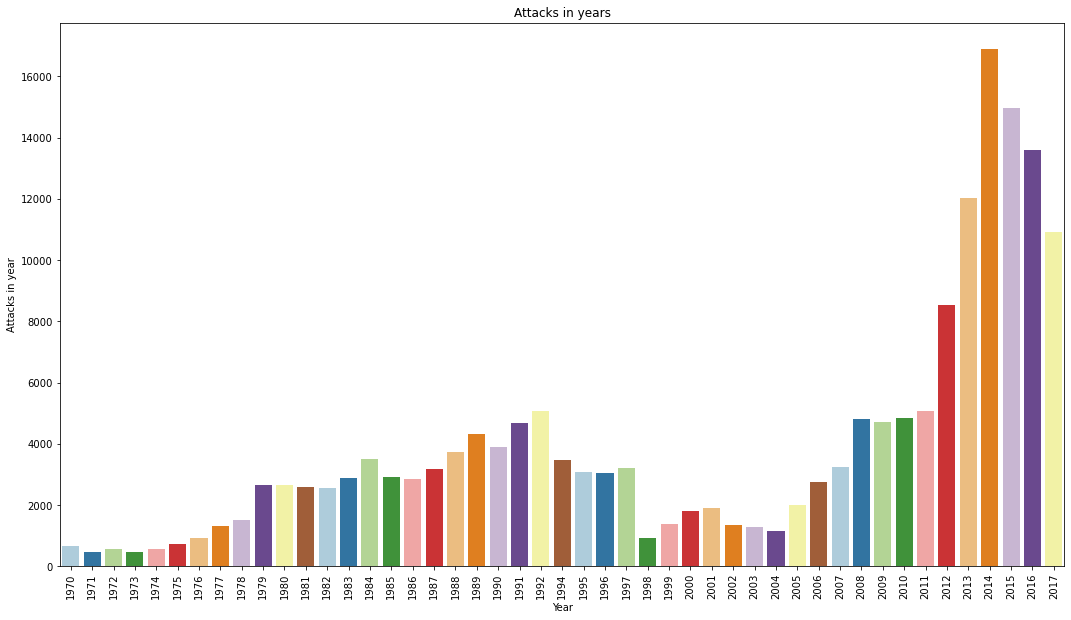

In [16]:
#Visualizing the data
plt.figure(figsize= (18,10))
sns.barplot(x = Year_data.index , y = Year_data.values,palette="Paired")
plt.title('Attacks in years')
plt.xlabel('Year')
plt.ylabel('Attacks in year')
plt.xticks(rotation = 90)
plt.show()

### Most used Attack type

In [17]:
# Most frequent attck type
Attack_data = data['AttackType'].value_counts()
Attack_data

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

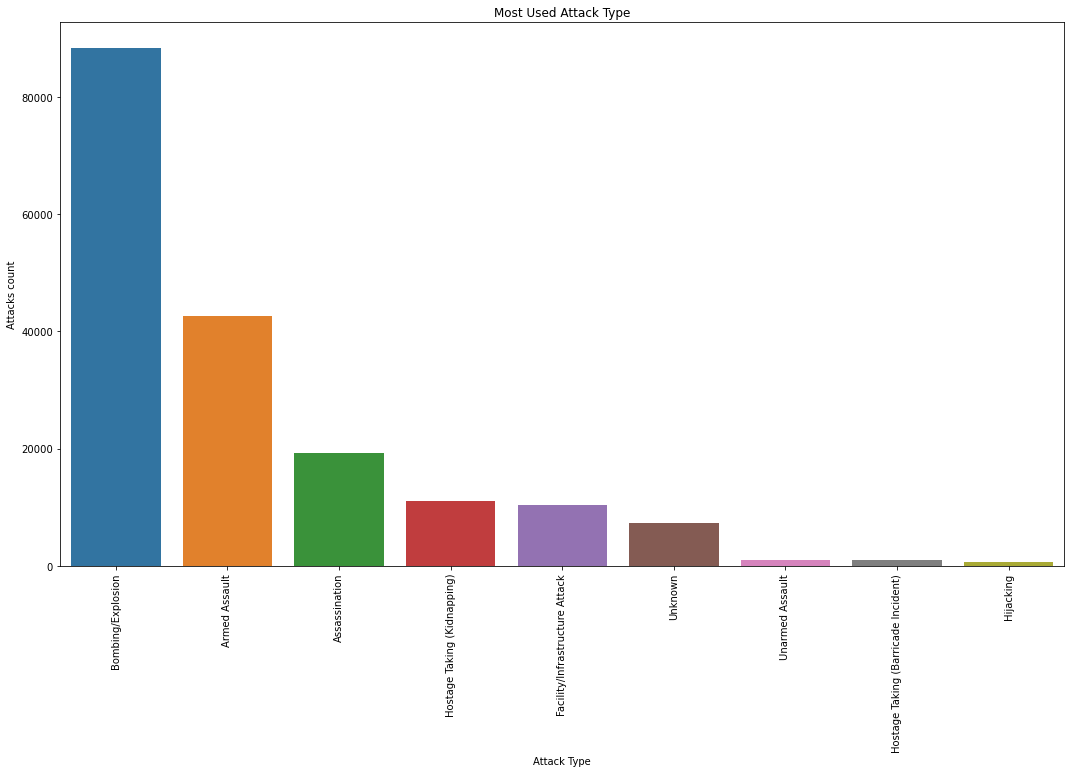

In [18]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Attack_data.index , y = Attack_data.values)
plt.title('Most Used Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### Most Frequent Terrorist Groups involved in Attacks

In [19]:
Group_data = data['Group'].value_counts().nlargest(n=15)
Group_data

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64

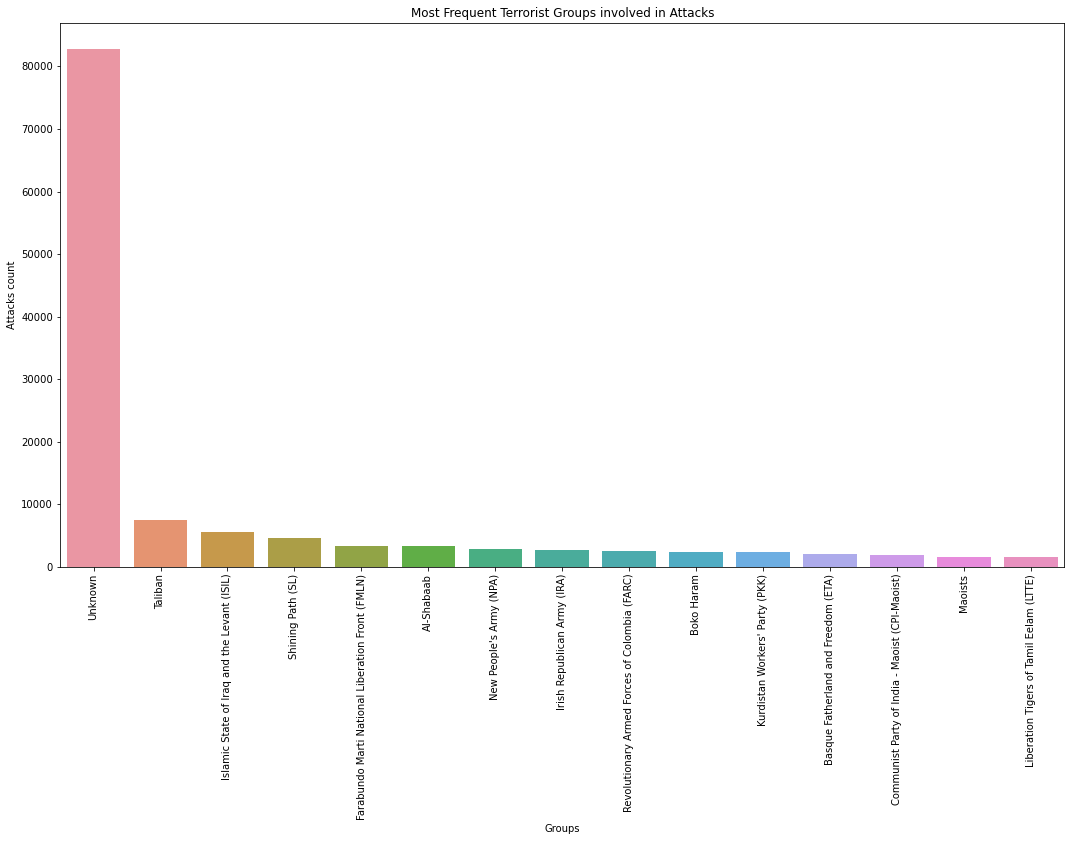

In [20]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Group_data.index , y = Group_data.values)
plt.title('Most Frequent Terrorist Groups involved in Attacks')
plt.xlabel('Groups')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### Most Used Weapon Type

In [21]:
Weapon_data = data['Weapon_type'].value_counts()
Weapon_data

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

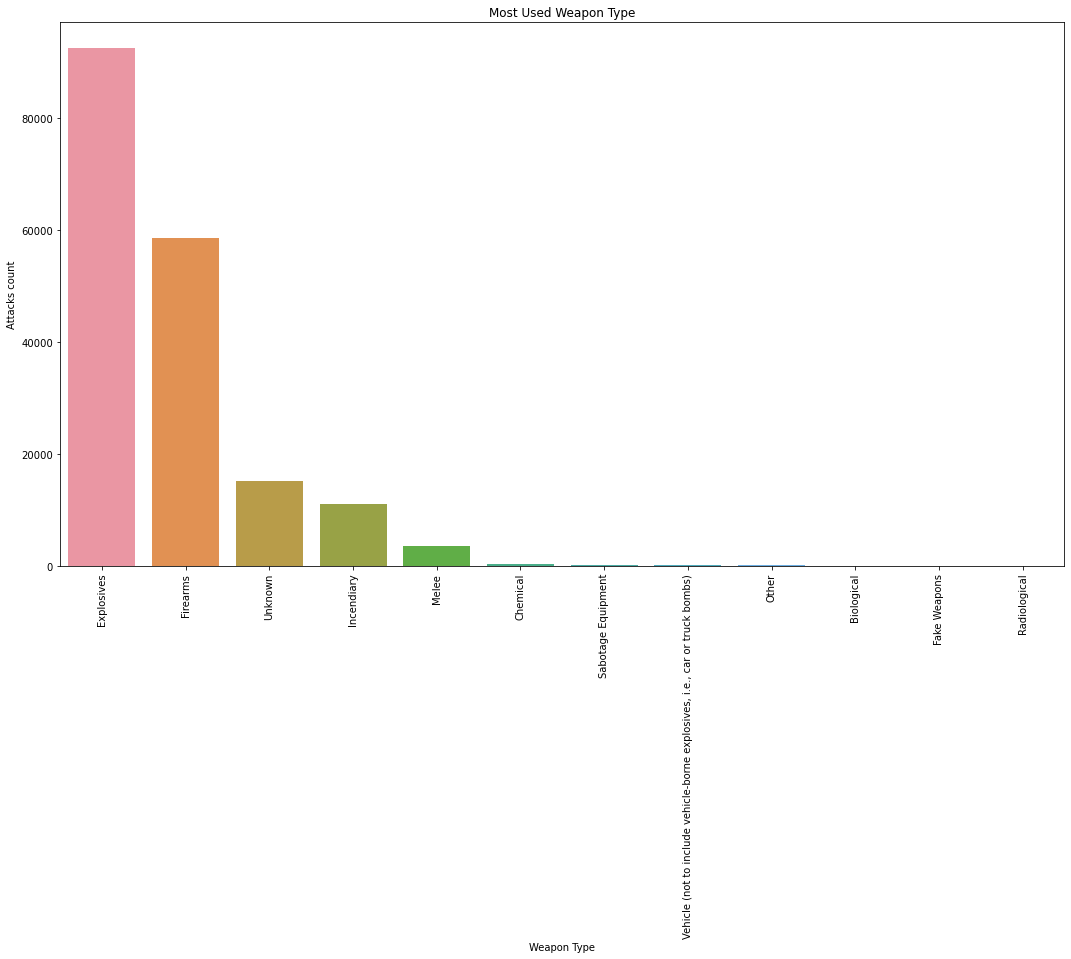

In [22]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Weapon_data.index , y = Weapon_data.values)
plt.title('Most Used Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### Most Frequent Target Type

In [23]:
Target_data = data['Target_type'].value_counts().nlargest(n=15)
Target_data

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: Target_type, dtype: int64

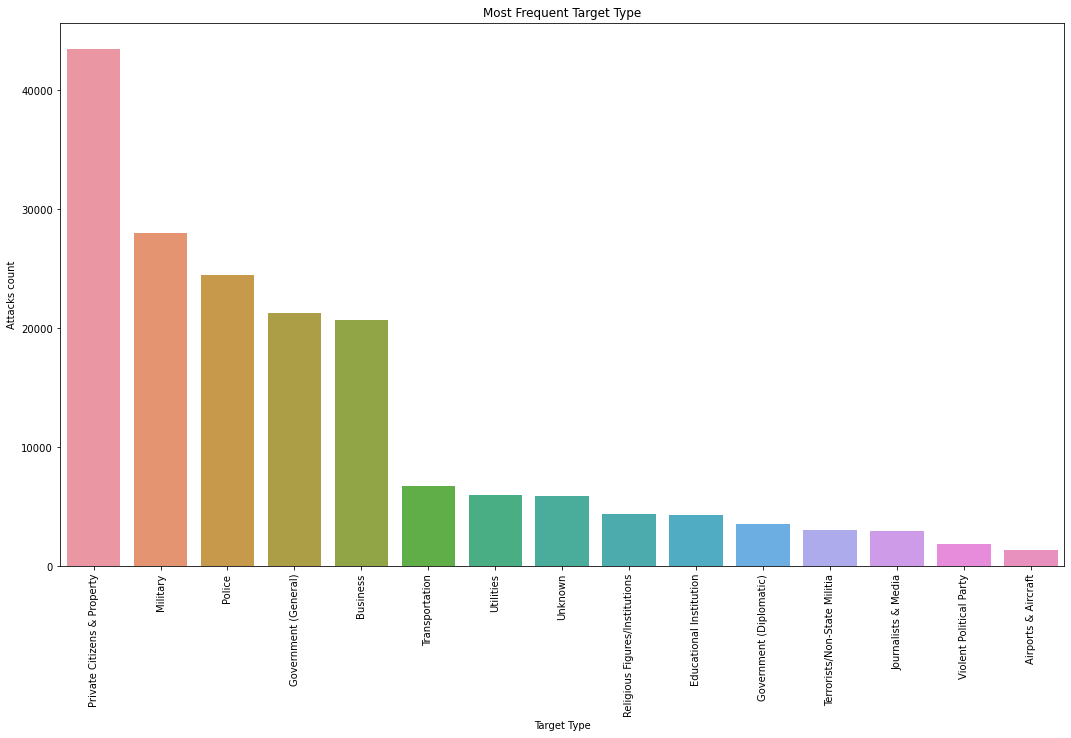

In [24]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Target_data.index , y = Target_data.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### Wounded vs Killed visualization¶

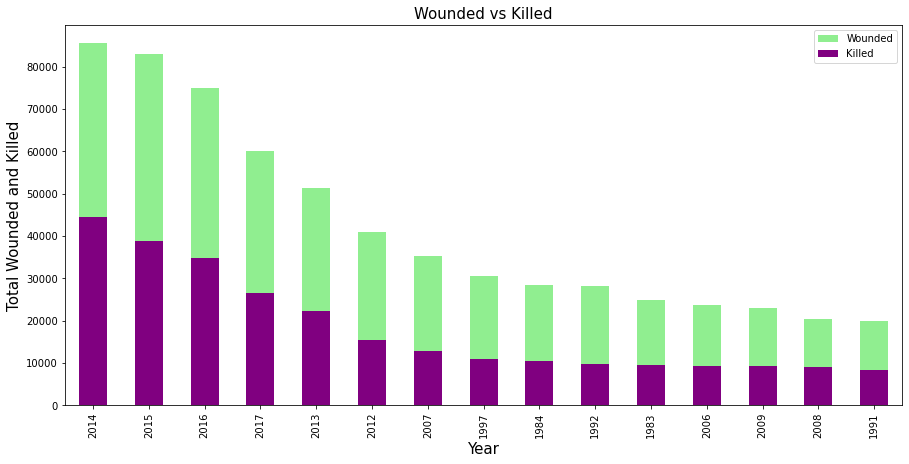

In [25]:
# Wounded vs Killed with respect to year
affected = data.groupby('Year').sum()['affected'].nlargest(n=15) #top 15 states with highest sales
killed = data.groupby('Year').sum()['Killed'].nlargest(n=15) #top 15 states with highest sales
# plt.style.use('seaborn')
affected.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'lightgreen', label = 'Wounded')
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='Purple', label = 'Killed')
plt.xlabel('Year',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()


## Hotspots of Terror attacks

### Countries with most attacks

In [26]:
# 10 countries with most attacks
Country_data = data['Country_Name'].value_counts().head(10)
Top_countries = list(Country_data.index)
Country_data

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country_Name, dtype: int64

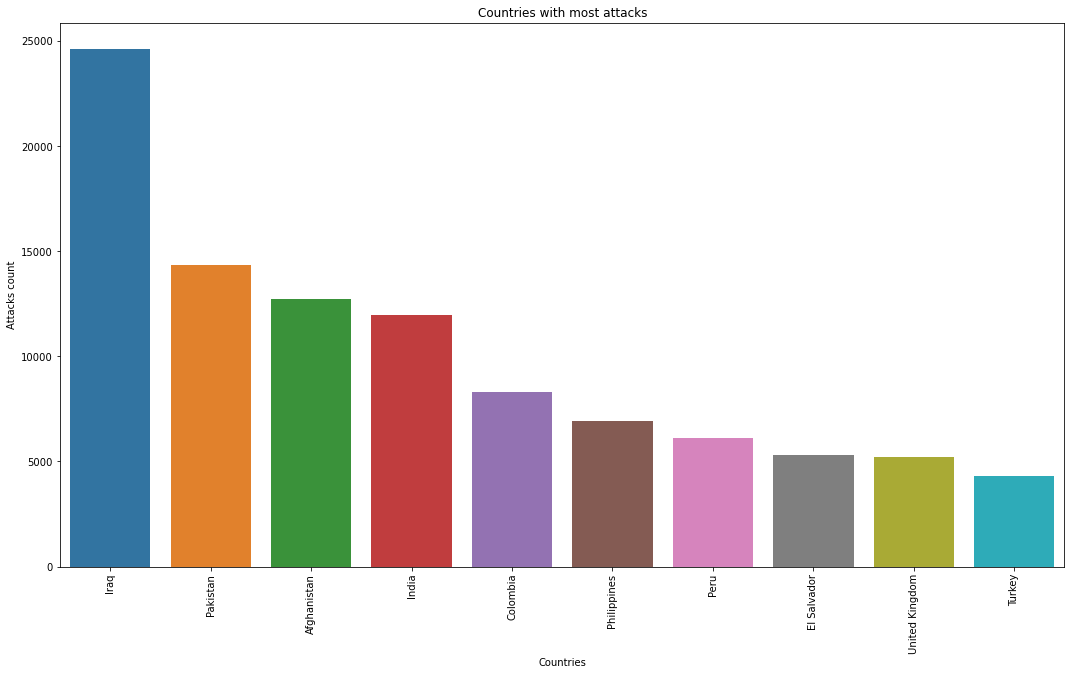

In [27]:
plt.figure(figsize= (18,10))
sns.barplot(x = Country_data.index , y = Country_data.values)
plt.title('Countries with most attacks')
plt.xlabel('Countries')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### States with most attacks

In [28]:
# 10 States with most attacks
State_data = data['State'].value_counts().head(10)
State_data

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

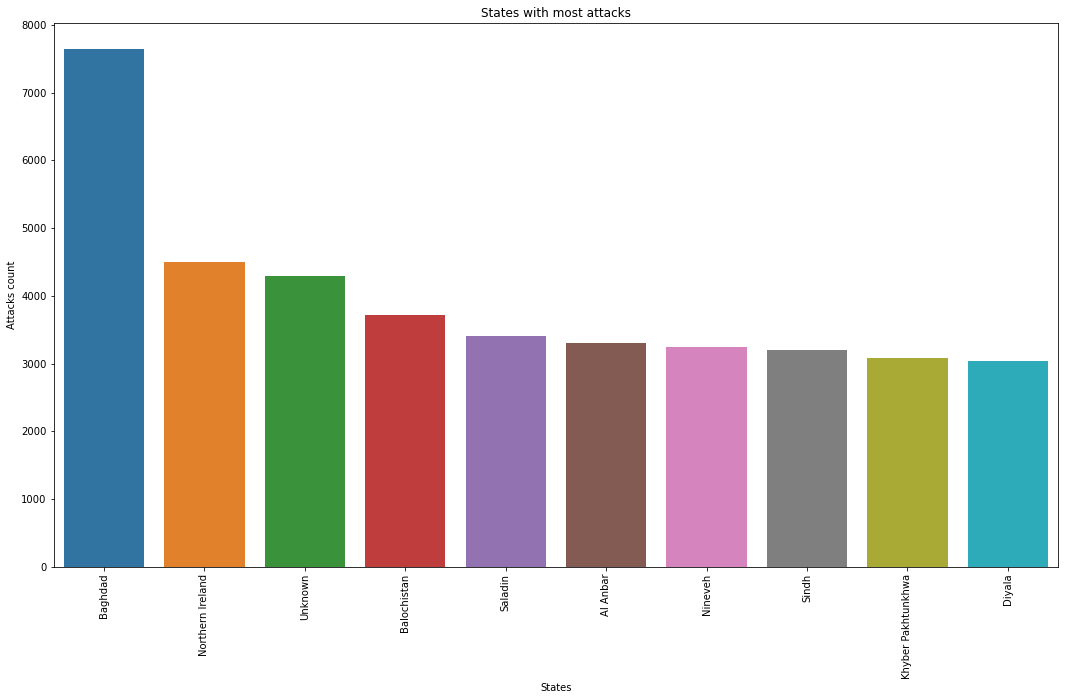

In [29]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = State_data.index , y = State_data.values)
plt.title('States with most attacks')
plt.xlabel('States')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()


### Cities with most attacks

In [30]:
# 10 cities with most attacks
City_data = data['City'].value_counts().head(10)
City_data

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

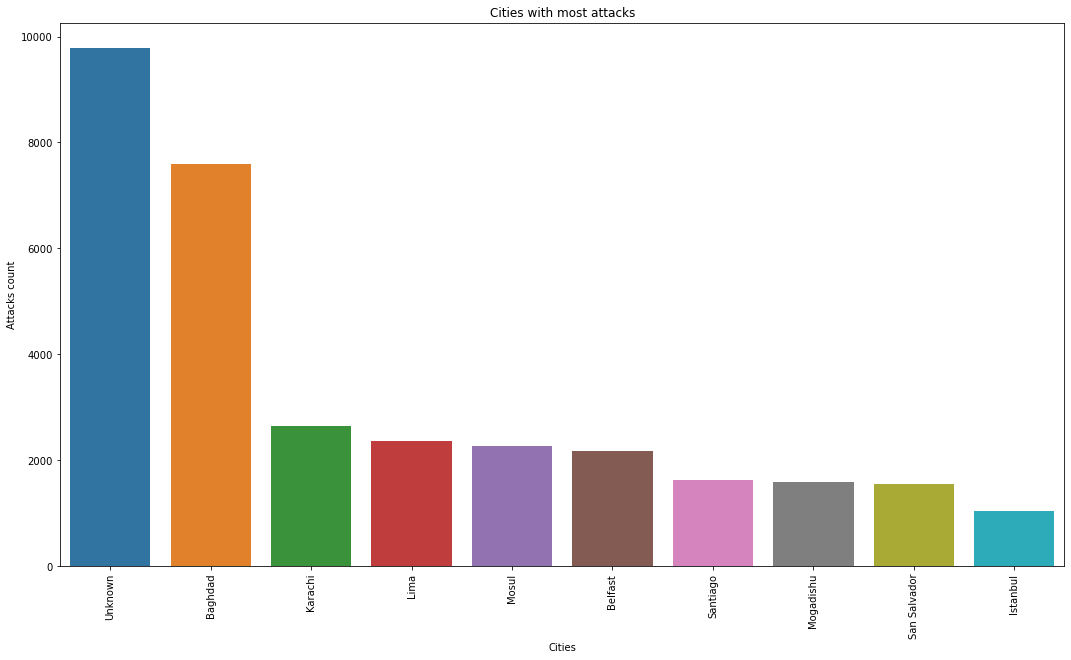

In [31]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = City_data.index , y = City_data.values)
plt.title('Cities with most attacks')
plt.xlabel('Cities')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### Region with most attacks

In [32]:
# 1o Regions with most attacks
Region_data = data['Region'].value_counts().head(10)
Region_data

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

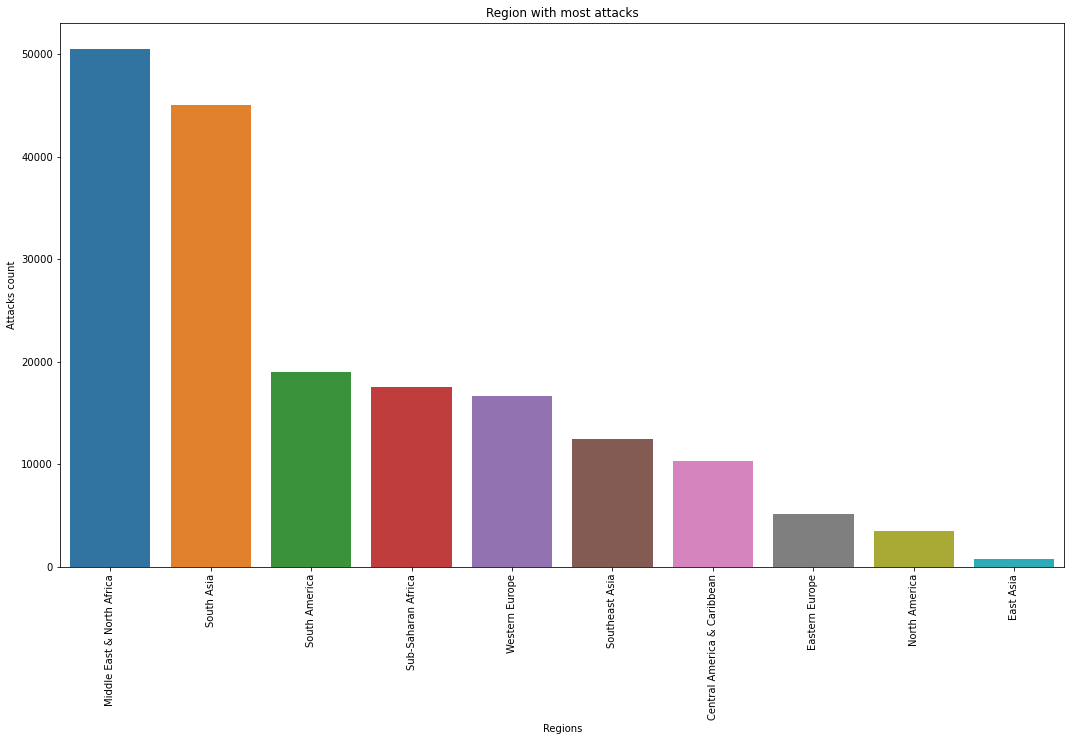

In [33]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Region_data.index , y = Region_data.values)
plt.title('Region with most attacks')
plt.xlabel('Regions')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## A clear overview of Terror attack hotspots are...

### State wise attacks in each country

In [34]:
Hotspots = pd.DataFrame(data.groupby('Country_Name')['State'].value_counts().groupby(level = 0).head(3))
Hotspots.columns = ['No_of_times_attacked']
Hotspots

No_of_times_attacked
Country_Name State                                   
Afghanistan  Helmand                             1234
             Kandahar                            1122
             Nangarhar                            972
Albania      Tirana                                26
             Gjirokaster                            9
...                                               ...
Zambia       North-Western                          9
             Unknown                                8
Zimbabwe     Harare                                24
             Salisbury                             16
             Matabeleland South                    12

[567 rows x 1 columns]

### State wise attacks in Top attacked Countries

In [35]:
df = pd.DataFrame
df = Hotspots.loc[Hotspots.index.get_level_values(0) == Top_countries[0]]
for i in range(1,len(Top_countries)):
    df = pd.concat([df,Hotspots.loc[Hotspots.index.get_level_values(0) == Top_countries[i]]])
Top_states = list(df.index.get_level_values(1))
df

No_of_times_attacked
Country_Name   State                                     
Iraq           Baghdad                               7644
               Saladin                               3411
               Al Anbar                              3299
Pakistan       Balochistan                           3710
               Sindh                                 3206
               Khyber Pakhtunkhwa                    3084
Afghanistan    Helmand                               1234
               Kandahar                              1122
               Nangarhar                              972
India          Jammu and Kashmir                     2454
               Assam                                 1151
               Manipur                               1100
Colombia       Antioquia                             1891
               Bogota                                1005
               Valle del Cauca                        578
Philippines    Maguindanao                            683
               North Cotabato                         529
               Metropolitian Manila                   473
Peru           Lima                                  2615
               Ayacucho                              1042
               Junin                                  502
El Salvador    San Salvador                          1923
               Usulutan                               397
               Unknown                                379
United Kingdom Northern Ireland                      4498
               England                                695
               Scotland                                21
Turkey         Istanbul                              1066
               Diyarbakir                             367
               Sirnak                                 342

### City wise attacts in each danger zone states of each country 

In [36]:
Hotspots1 = pd.DataFrame(data.loc[data['State'].isin(Top_states)])
df1 = pd.DataFrame(Hotspots1.groupby(['Country_Name','State'])['City'].value_counts().groupby(level = 1).head(3))
df1.columns = ['No_of_times_attacked']
df1.head(60)

No_of_times_attacked
Country_Name State              City                                    
Afghanistan  Helmand            Lashkar Gah                          190
                                Unknown                              119
                                Sangin district                      117
             Kandahar           Kandahar                             363
                                Unknown                               80
                                Maywand district                      66
             Nangarhar          Jalalabad                            266
                                Unknown                               65
                                Khogyani district                     43
             Unknown            Unknown                               86
                                Gayan Alwara Mandi                     1
                                Mehrpol                                1
Colombia     Antioquia          Medellin                             848
                                Unknown                               89
                                Apartado                              53
             Bogota             Bogota                               984
                                Bogota district                       13
                                bogota                                 5
             Valle del Cauca    Cali                                 310
                                Buenaventura                          27
                                Tulua                                 21
El Salvador  San Salvador       San Salvador                        1557
                                Apopa                                 58
                                Soyapango                             50
             Usulutan           Usulutan                              76
                                Santiago de Maria                     46
                                Jucuapa                               34
India        Assam              Unknown                               97
                                Guwahati                              77
                                Kokrajhar district                    38
             Jammu and Kashmir  Srinagar                             657
                                Sopore                               102
                                Unknown                               86
             Manipur            Imphal                               426
                                Unknown                               51
                                Moreh                                 27
Iran         Baghdad            Baghdad                                1
Iraq         Al Anbar           Fallujah                             579
                                Ramadi                               508
                                Abu Ghraib                           324
             Baghdad            Baghdad                             7585
                                Hawr Rajab                            43
             Saladin            Tikrit                               418
                                Tuz Khormato                         277
                                Samarra                              268
Pakistan     Balochistan        Quetta                               803
                                Dera Bugti                           152
                                Sui                                  116
             Khyber Pakhtunkhwa Peshawar                             587
                                Jamrud                               147
                                Bara                                 130
             Sindh              Karachi                             2650
                                Hyderabad                            105
                                Unkno

### Conclusion :
#### Hot zones are -
- Top 3 Countries with most attacks are Iraq,Pakistan and Afganistan.
- Top 3 states with most attacks are Baghdad,Northern Ireland and Unknown state.
- Top 3 Cities with most attacks are Unknown city, Baghdad and Karachi.
- Top 3 regions with most attacks are Middle East & North Africa , South Asia and South America.
- Year with most attacks is 2014.
- Most frequent terrorist groups involved in attacks are Taliban and Islamic State of Iraq and the Levant (ISIL).

#### Security issues and Insights drawn from the data are :

1] The most frequent attack found is Bombing/Explosion , we can protect attacks of this weapon type by -

- Using Survillence cameras and security at crowded places to check for any suspicious activities.
- Being alert in crowded places where explosions are most likely to happen.

2] Most frequent target types are Private Citizens & Property and Military.


